Name: Zachary Laird

Labpartner(s): Sharmin Siddika, Fahmida Akhter, Israt Tama, Sarah Brannum

In [1]:
#import statements go here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rand
import cartopy
import xarray as xr

# Class 12.2

# Warmup 12.2

Kelsey and Asante are going to demo ARC PRO and give you some exercises.

# Lecture 12.2

### Announcements

- Reminder **Reminder all labs through 9.2 need to be completed, or resubmitted if you did not get a satisfactory grade, by end of the day Friday 11/15 to pass the course.** The understanding of this beginning material is needed to complete this course. If you turned it in or resubmitted one and are waiting for me to grade it, no worries. We can get them all finalized next week. 
  
- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.


### Agenda
- Predator prey modeling. We are going to actually do some scientific modelng today!

## Predator Prey Modeling

See what this lab was based on here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  12.2.1 Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

#### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

**1.Rate equation for prey**

**$dx/dt = \alpha x - \beta x y $**
--> basically **dx/dt = growth - grazing**

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

**2.Rate equation for predator**

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### 12.2.2 Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set the parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [67]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [68]:
# define the function that represents the Lotka-Volterra equations
# u is the x,y state of the system, what the population is at a given time.
# u = [x,y] on array with both the predetor and prey variables

def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [6]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. # initial prey amount
y0 = 2. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [7]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
n=0
u_euler[n+1]=euler_step(u_euler[n], f, dt)
u_euler

array([[10.  ,  2.  ],
       [ 9.86,  2.12],
       [ 0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ]])

In [9]:
# use a for loop to call the function euler_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [10]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [11]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

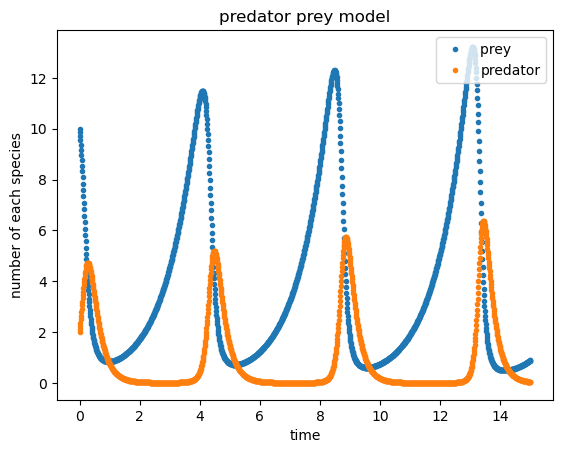

In [12]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

**Let's think a bit about what this solution means, what is going on here?**

We start with a lot of prey, then the predators begin eating them so they increase in population and then the prey becomes so scarce that the predators decrease in population and this continues as a cycle. This is because the predator population is dependent on the prey population. 

**What happens if we start with different initial conditions? Like more prey and less predators.**

In [13]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 15. # initial prey amount
y0 = 0. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [14]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [15]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

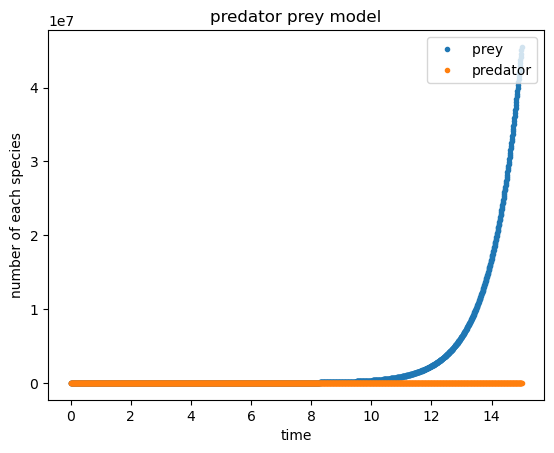

In [16]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

**What happened?**

Because the population of prey went unchecked due to no presence of predators, the population experienced an exponentialm growth completely unchecked, maybe like some other species we know *cough cough* human beings

**What if we start with the same amount of prey and predators?**

In [17]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 15. # initial prey amount
y0 = 15. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [18]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [19]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

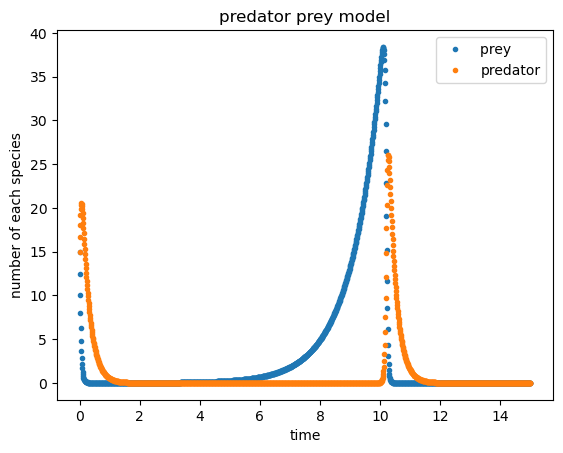

In [20]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

**What happened?**

The predators vastly consume the prey and then rapidly decrease in population until the prey begin coming back after some time and then the prey, with very few predators rapidly increase in population until the predators begin coming back and start consuming the prey again and the cycle repeatsz itself. 

**Let's mess around with the model parameters. What if the prey grow faster?**

In [21]:
alpha = 10
beta = 1.2
gamma = 4.
delta = 1.

In [22]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [23]:
def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [24]:
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 5. # initial prey amount
y0 = 5. # initial predator amount
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

In [25]:
np.seterr(over='ignore')
try:
    for n in range(N-1):
        u_euler[n+1] = euler_step(u_euler[n], f, dt)
except OverflowError as e:
    print(f"Overflow error occurred: {e}")

In [26]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

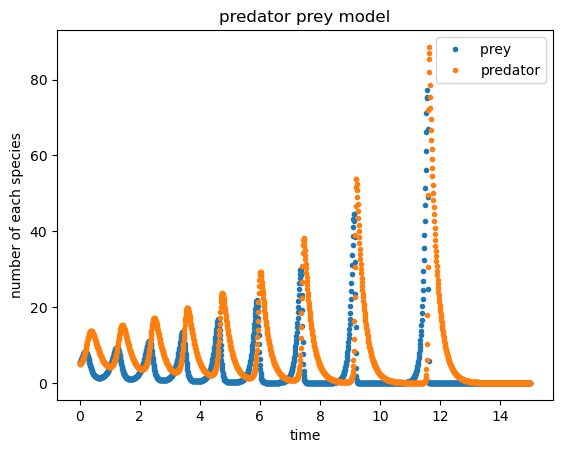

In [27]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

**What happened?**

### 12.2.3 System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

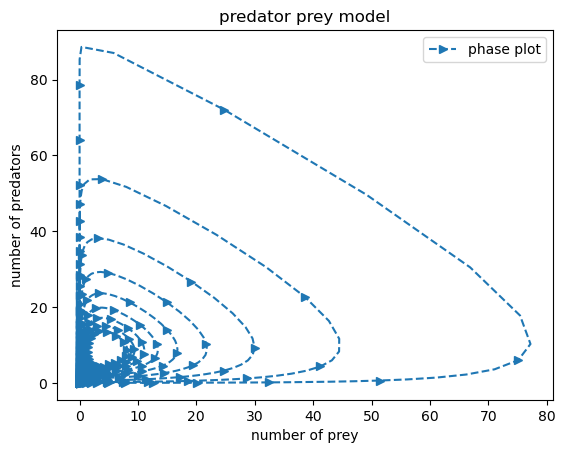

In [28]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 12.2

#### E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

Text(0.5, 1.0, 'Predator-Prey Model with ten times Time Step')

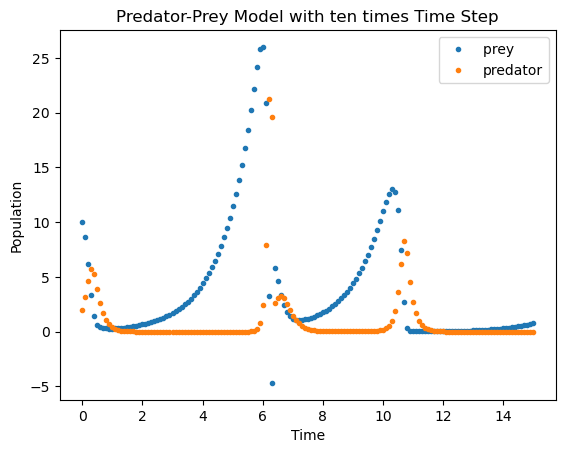

In [29]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.1                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model with ten times Time Step")

Text(0.5, 1.0, 'Predator-Prey Model with Smaller Time Step')

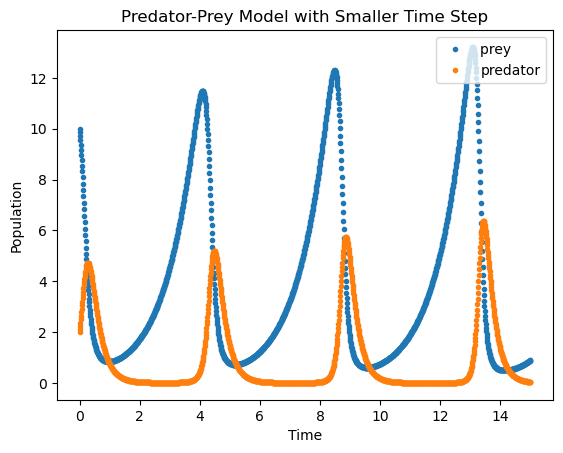

In [30]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model with Smaller Time Step")

The frequency of occurence of the collapse and rise of a population is higher the more you decrease the timestep. The peaks also decrease as you decrease the timestep.

Text(0.5, 1.0, 'Predator-Prey Model with 100 times smaller Time Step')

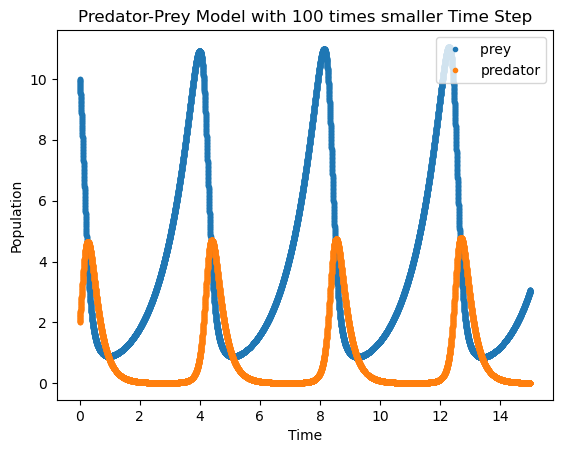

In [31]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.001                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model with 100 times smaller Time Step")

Here the population values are closer together within each species.

#### E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system using algebra. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot and plot it. What happens if you start at the steady state? What happens if you start near the steady state?

$\alpha x - \beta x y  = 0$

$\delta x y -\gamma y  = 0$



The steady states are $y=\alpha/\beta$
And $x=\gamma/\delta$

If you start near the steady state the population of the predators and prey never increase nor decrease. 

0.02656621992118602
8.98


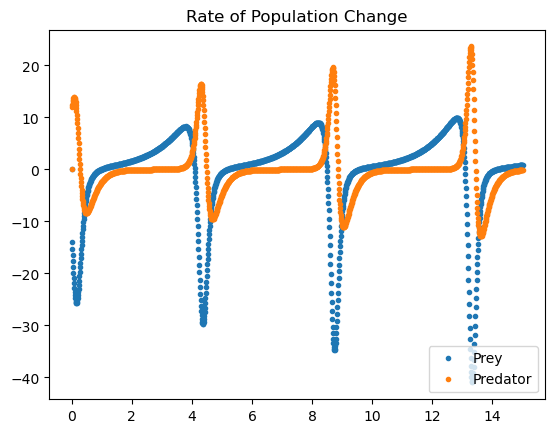

In [34]:
growthrt = np.zeros((N, 2))
for n in range(N-1):
    growthrt[n+1] = (u_euler[n+1]-u_euler[n])/dt

growth_diff=np.absolute(growthrt[:,0]-growthrt[:,1])
mindif=0
for n in range(len(growth_diff)):
    diff=np.absolute(growthrt[n,0]-growthrt[n,1])
    if n==0:
        continue
    if n==1:
        mindif=np.absolute(0-diff)
        index=n
    if np.absolute(0-diff)<mindif:
        mindif=diff
        index=n
print(mindif) #how close to 0 the values are
print(index*dt) #time step where 0 occurs


#print(population_growth_rate)
plt.plot(time, growthrt[:,0], '.', label = 'Prey')
plt.plot(time, growthrt[:,1], '.', label = 'Predator')
plt.title('Rate of Population Change')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Predator-Prey Model with Steady States added')

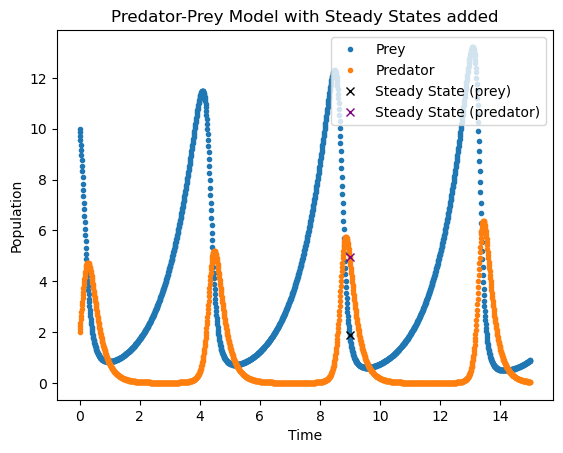

In [35]:
alpha = 1. 
beta = 1.2 
gamma = 4. 
delta = 1. 

x0 = 10. 
y0 = 2. 
t0 = 0.


T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'Prey')
plt.plot(time, y_euler, '.', label = 'Predator')
plt.plot(time[index],u_euler[index,0], 'x',label='Steady State (prey)', color = 'black')
plt.plot(time[index],u_euler[index,1], 'x',label='Steady State (predator)', color = 'purple')

plt.legend(loc='upper right')

plt.legend(loc='upper right')
#labels
plt.xlabel("Time")
plt.ylabel("Population")
#title
plt.title("Predator-Prey Model with Steady States added")

Text(0.5, 1.0, 'Predator Prey Model Phase Plot with Steady State')

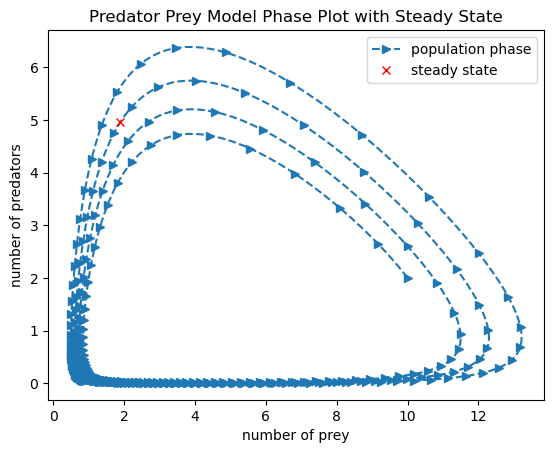

In [37]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'population phase')
plt.plot(u_euler[index,0],u_euler[index,1], 'x',label='steady state', color = 'red')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("Predator Prey Model Phase Plot with Steady State")

#### E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ? How does the dt, the timestep, affect your answer using this "higher order" algorithm?

In [69]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

Text(0.5, 1.0, 'Predator-Prey Model')

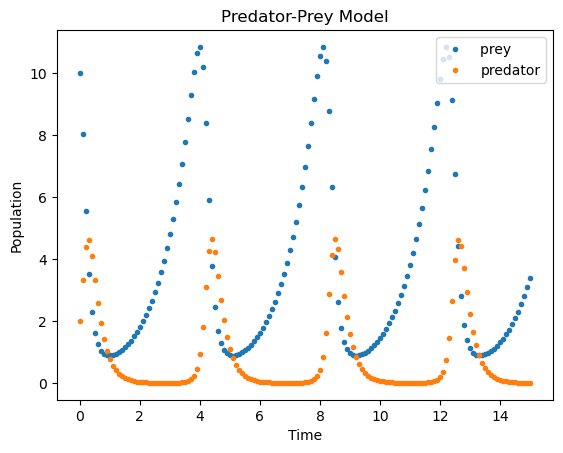

In [70]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.1                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

Text(0.5, 1.0, 'Predator-Prey Model')

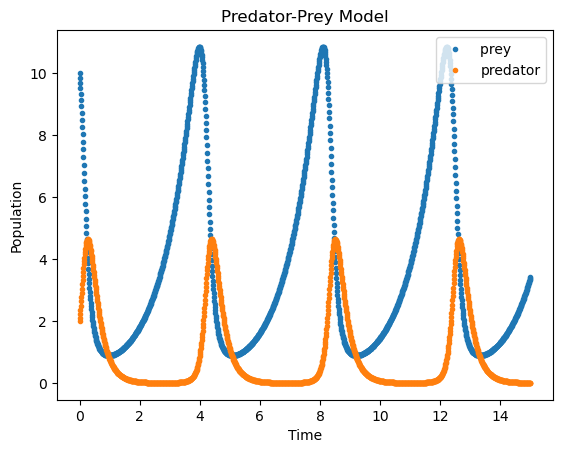

In [71]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

The smaller timestep doesn't affect the RK4 model as much. The decrease does however increase the number of points. 

#### E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

Text(0.5, 1.0, 'Predator-Prey Model')

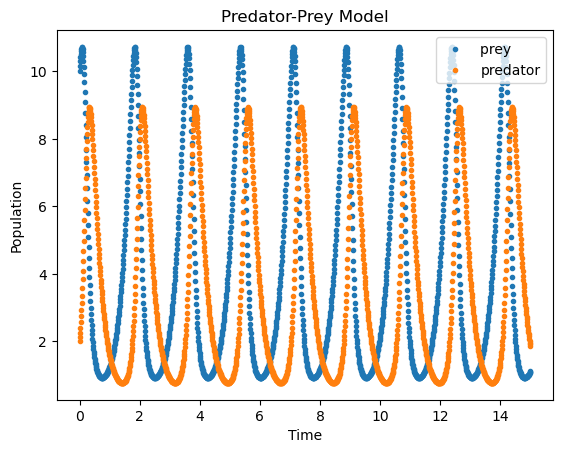

In [72]:
alpha = 4. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

In [73]:
#increasing the alpha increases the rise and fall of populations in frequency significantly
#it also significantly increases the peaks

Text(0.5, 1.0, 'Predator-Prey Model')

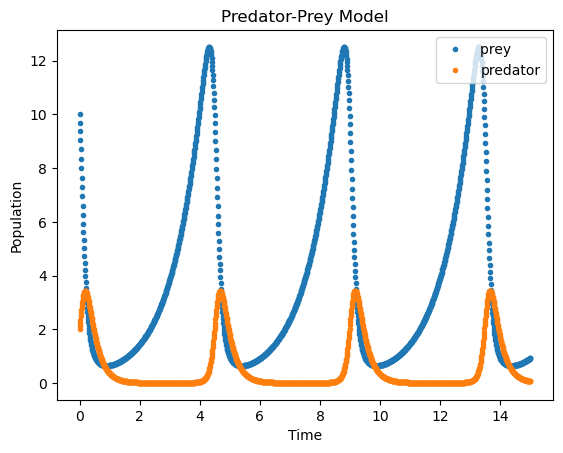

In [74]:
alpha = 1. #growth rate 
beta = 2. #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

In [75]:
#changing the beta affects the population  of predators and decreases their peaks
#it also increases the peaks of the prey

Text(0.5, 1.0, 'Predator-Prey Model')

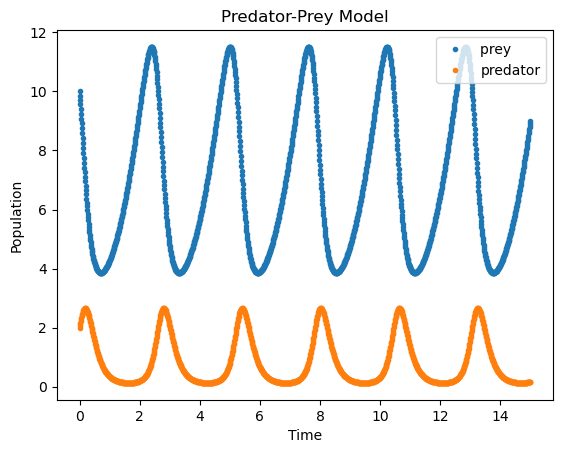

In [76]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 7. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

In [77]:
#Increasing the gamma causes the predator population to decrease in their peaks
#it also causes the prey population to have higher peaks and to never fully collapse 
#the frequency of rise and falls in population is also increased

Text(0.5, 1.0, 'Predator-Prey Model')

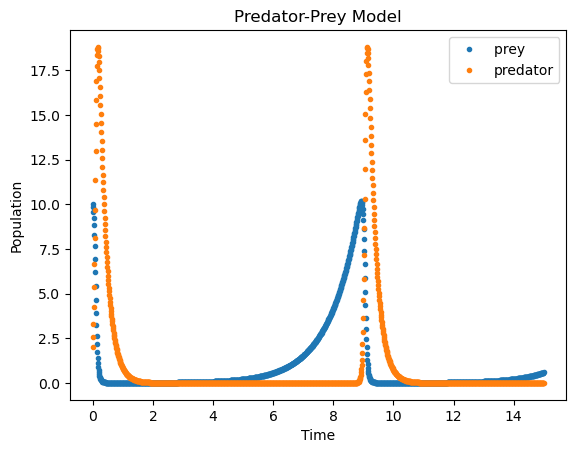

In [78]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 3. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

In [79]:
#increasing the delta massively increases the peaks of both species
#It also significantly decreases the frequency of rises but rapidly increasing the frequency of falls.

#### E.5 (Advanced, required for grad students)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example linked above.

In [80]:
def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)-alpha*y**2])

Text(0.5, 1.0, 'Predator-Prey Model')

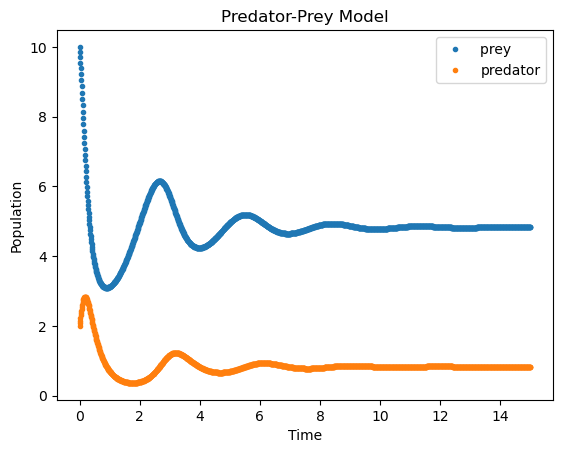

In [81]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")

In [82]:
def f(u):
    """Returns the rate of change of species
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y**2), -y*(gamma - delta*x)-alpha*y**2])

Text(0.5, 1.0, 'Predator-Prey Model')

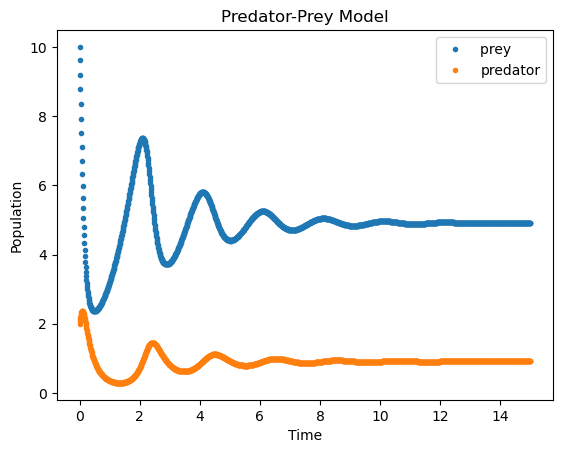

In [84]:
alpha = 1. #growth rate 
beta = 1.2 #prey
gamma = 4. #predators
delta = 1. #predators


x0 = 10. 
y0 = 2. 
t0 = 0.

T  = 15.0                          
dt = 0.01                           
N  = int(T/dt) + 1                 

u_euler = np.zeros((N, 2))


u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)


time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Predator-Prey Model")